Descriptive analysis

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set(style="whitegrid")


In [6]:
# Load the dataset
df = pd.read_csv('../../doc1/Data/raw_analyst_ratings/raw_analyst_ratings.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)

# Display basic statistics for headline lengths
headline_length_stats = df['headline_length'].describe()
headline_length_stats


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Visualize the Distribution of Headline length

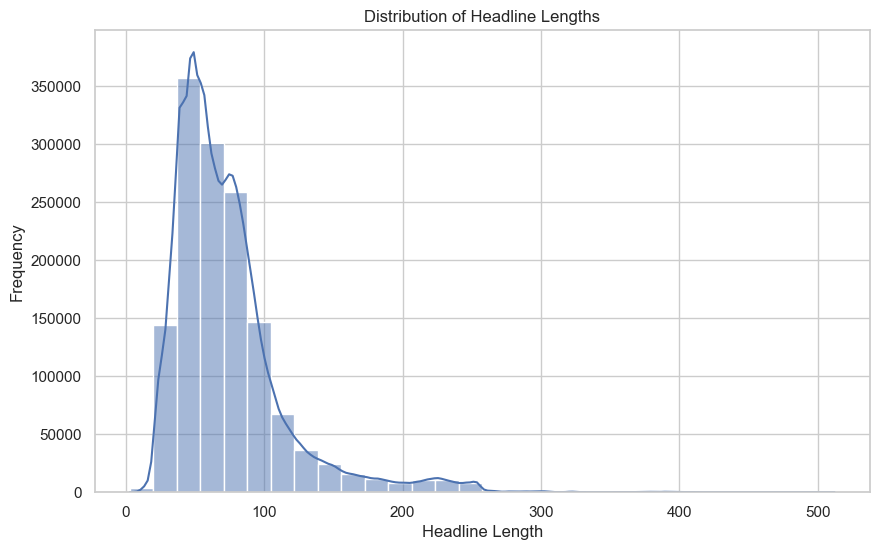

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], kde=True, bins=30)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

Count the Number of Articles per Publisher

In [9]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the result
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_4704\792718520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")


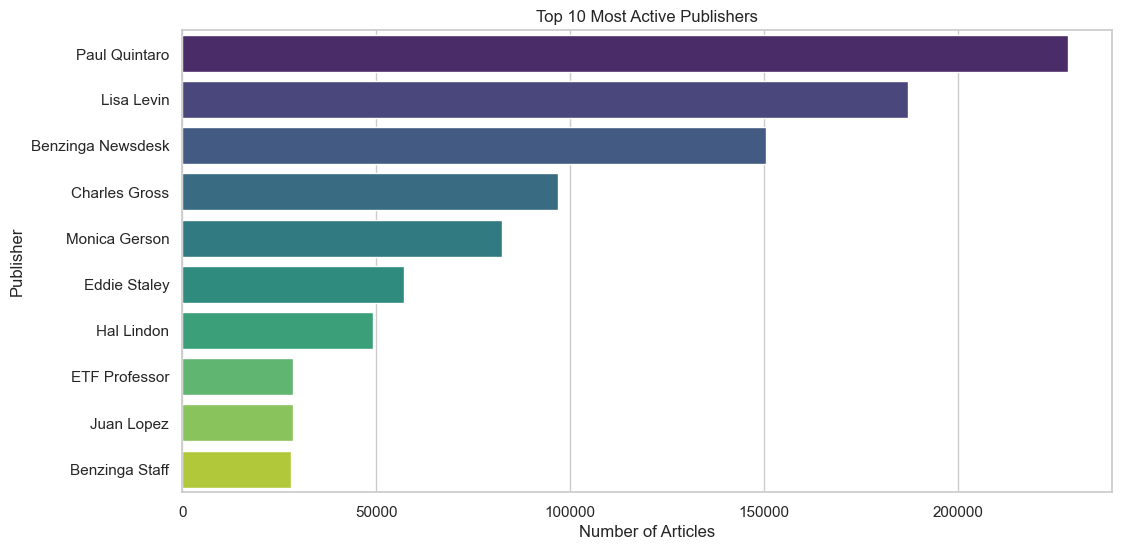

In [10]:
plt.figure(figsize=(12, 6))
top_publishers = publisher_counts.head(10)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

Analyze the Publication Dates

In [17]:
# Convert the 'date' column to datetime, with coercion of errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Standardize all dates to a single timezone (e.g., UTC)
df['date'] = df['date'].dt.tz_convert('UTC')

# Now you can proceed with extracting date-related features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()

# Group by date to see trends over time
daily_articles = df.groupby(df['date'].dt.date).size()

# Display the result
daily_articles.head()


date
2020-05-22    26
2020-05-26    28
2020-06-03    56
2020-06-05    62
dtype: int64

Visualize the Number of Articles Published Over Time:

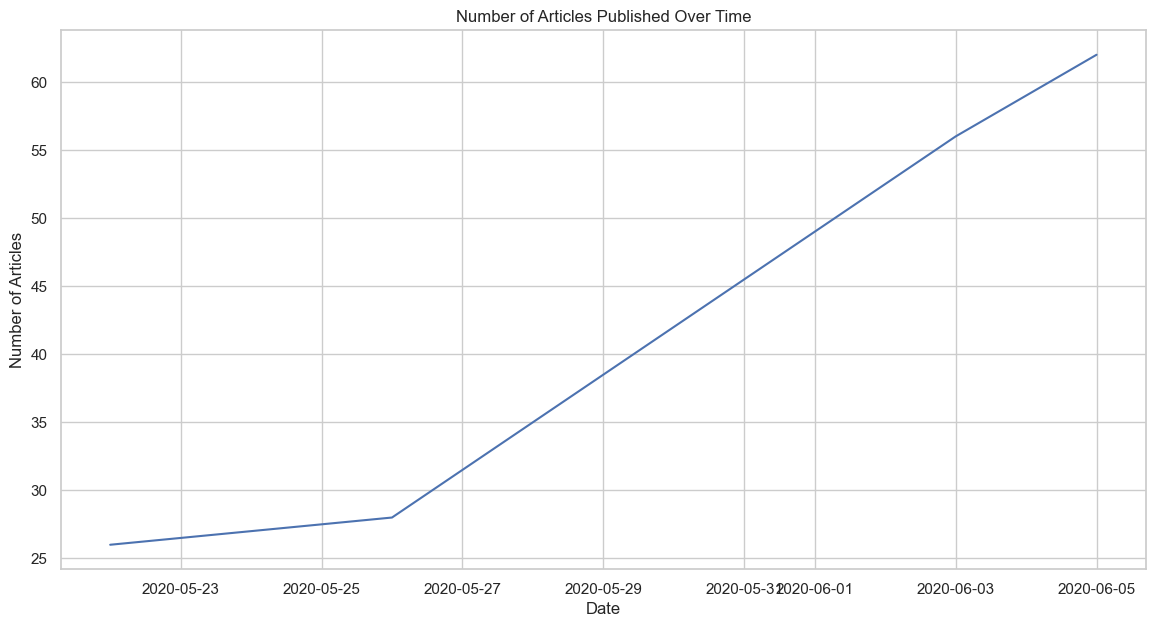

In [18]:
plt.figure(figsize=(14, 7))
daily_articles.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


Analyze trends by week

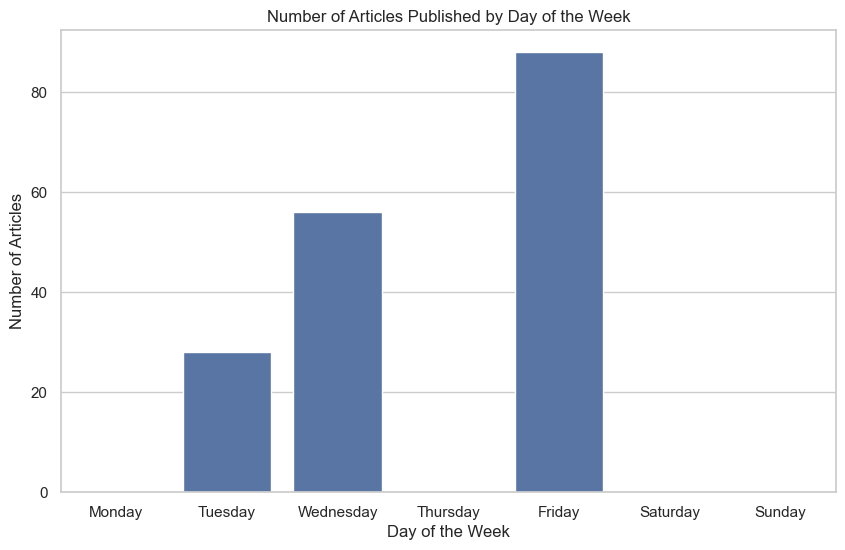

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()
